# Import libraries

In [199]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as py
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv(r"E:\c drive\Desktop\CloudyML\New CloudyML\Python\Pandas Project Datasets Csv's and pyb files\Datasets\homicide_by_countries.csv")

In [4]:
data

,Location,Region,Subregion,Rate,Count,Year
0,Afghanistan,Asia,Southern Asia,6.7,2474,2018
1,Albania,Europe,Southern Europe,2.1,61,2020
2,Algeria,Africa,Northern Africa,1.3,580,2020
3,Andorra,Europe,Southern Europe,2.6,2,2020
4,Angola,Africa,Middle Africa,4.8,1217,2012
...,...,...,...,...,...,...
190,Venezuela,Americas,South America,36.7,10598,2018
191,Vietnam,Asia,South-Eastern Asia,1.5,1358,2011
192,Yemen,Asia,Western Asia,6.8,1703,2013
193,Zambia,Africa,Eastern Africa,5.4,853,2015


In [69]:
data["Region"].replace("Americas" , "N/S America" , inplace = True)

In [70]:
data.shape

(195, 6)

In [71]:
data.isnull().sum()

Location     0
Region       0
Subregion    0
Rate         0
Count        0
Year         0
dtype: int64

In [72]:
data.columns

Index(['Location', 'Region', 'Subregion', 'Rate', 'Count', 'Year'], dtype='object')

In [73]:
len(data)

195

In [74]:
data.count()

Location     195
Region       195
Subregion    195
Rate         195
Count        195
Year         195
dtype: int64

In [75]:
data.nunique()

Location     195
Region         5
Subregion     19
Rate          31
Count        151
Year          16
dtype: int64

In [76]:
data.dtypes

Location     object
Region       object
Subregion    object
Rate          int32
Count         int32
Year          int32
dtype: object

In [77]:
data["Rate"] = data["Rate"].astype(int)

In [78]:
data.dtypes

Location     object
Region       object
Subregion    object
Rate          int32
Count         int32
Year          int32
dtype: object

In [79]:
## if want to change data types of more columns :
my_list = ["Rate" , "Count" , "Year"]

for i in my_list:
    print(i)
    data[i] = data[i].astype(int)

Rate
Count
Year


In [80]:
data.dtypes

Location     object
Region       object
Subregion    object
Rate          int32
Count         int32
Year          int32
dtype: object

In [81]:
data.head()

,Location,Region,Subregion,Rate,Count,Year
0,Afghanistan,Asia,Southern Asia,6,2474,2018
1,Albania,Europe,Southern Europe,2,61,2020
2,Algeria,Africa,Northern Africa,1,580,2020
3,Andorra,Europe,Southern Europe,2,2,2020
4,Angola,Africa,Middle Africa,4,1217,2012


In [82]:
df1 = data.sort_values(by = "Count" , ascending = False)

df1

,Location,Region,Subregion,Rate,Count,Year
26,Brazil,N/S America,South America,22,47722,2020
125,Nigeria,Africa,Western Africa,22,44200,2019
78,India,Asia,Southern Asia,3,40651,2020
111,Mexico,N/S America,Central America,28,36579,2020
186,United States,N/S America,Northern America,6,21570,2020
...,...,...,...,...,...,...
73,Holy See,Europe,Southern Europe,0,0,2015
38,Channel Islands,Europe,Northern Europe,0,0,2010
145,Saint Helena,Africa,Western Africa,0,0,2009
151,San Marino,Europe,Southern Europe,0,0,2011


## 1) Location wise homicide count : 

In [83]:
df1 = data[["Location" , "Count"]].sort_values(by = "Count" , ascending = False).head(5)
df1

,Location,Count
26,Brazil,47722
125,Nigeria,44200
78,India,40651
111,Mexico,36579
186,United States,21570


## 2) Plotting of count 

<AxesSubplot:xlabel='Location'>

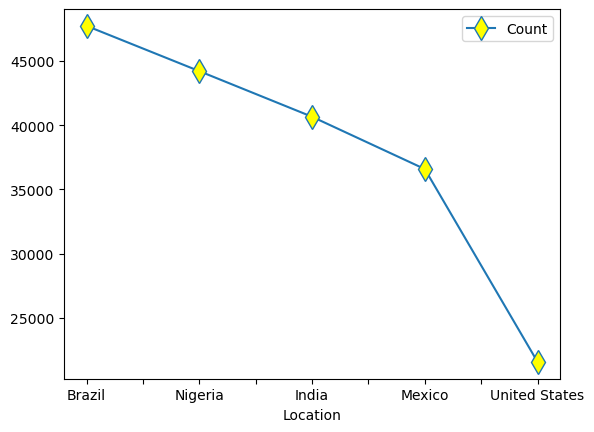

In [84]:
df1.plot(x = "Location" , y = "Count" , marker = "d" ,ms = 12,mfc = "Yellow")

<AxesSubplot:xlabel='Location'>

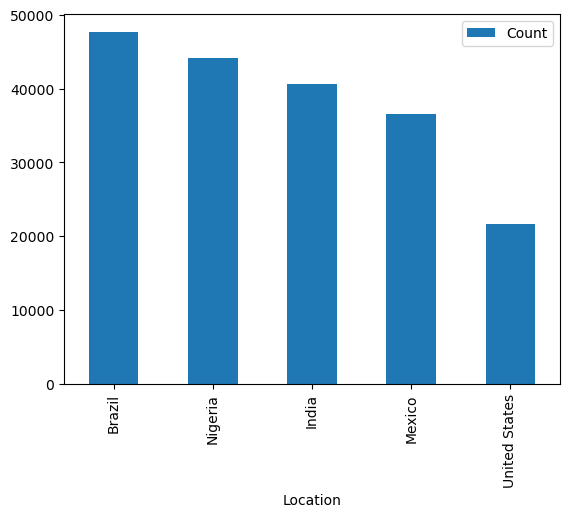

In [85]:
df1.plot(x = "Location" , y="Count" , kind = "bar")

<AxesSubplot:ylabel='Count'>

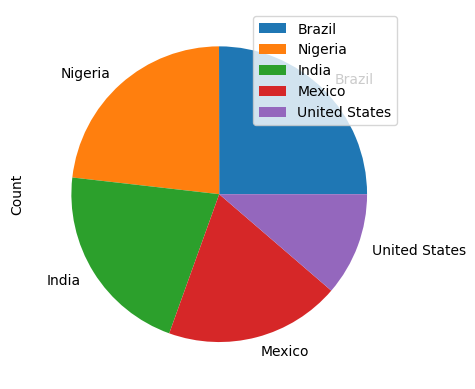

In [86]:
df1.plot(x = "Location" , y = "Count" , kind = "pie" ,labels = df1["Location"])

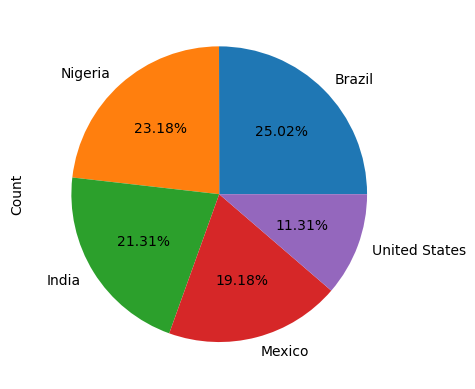

In [87]:
df1.plot(x = "Location" , y = "Count" ,kind = "pie" , labels = df1["Location"] , autopct = "%1.2f%%")
py.legend().set_visible(False)

In [88]:
df1["Percentage"] = ( (df1["Count"] * 100)/ df1["Count"].sum() ).round(2)

In [89]:
df1

,Location,Count,Percentage
26,Brazil,47722,25.02
125,Nigeria,44200,23.18
78,India,40651,21.31
111,Mexico,36579,19.18
186,United States,21570,11.31


In [90]:
data.head()

,Location,Region,Subregion,Rate,Count,Year
0,Afghanistan,Asia,Southern Asia,6,2474,2018
1,Albania,Europe,Southern Europe,2,61,2020
2,Algeria,Africa,Northern Africa,1,580,2020
3,Andorra,Europe,Southern Europe,2,2,2020
4,Angola,Africa,Middle Africa,4,1217,2012


## 3) Region wise homicide count :

In [91]:
data.groupby("Region")["Count"].sum()

Region
Africa          99481
Asia           105552
Europe          19869
N/S America    153597
Oceania           347
Name: Count, dtype: int32

In [92]:
df2 = data.groupby("Region")["Count"].sum().sort_values(ascending = False)

In [93]:
df2

Region
N/S America    153597
Asia           105552
Africa          99481
Europe          19869
Oceania           347
Name: Count, dtype: int32

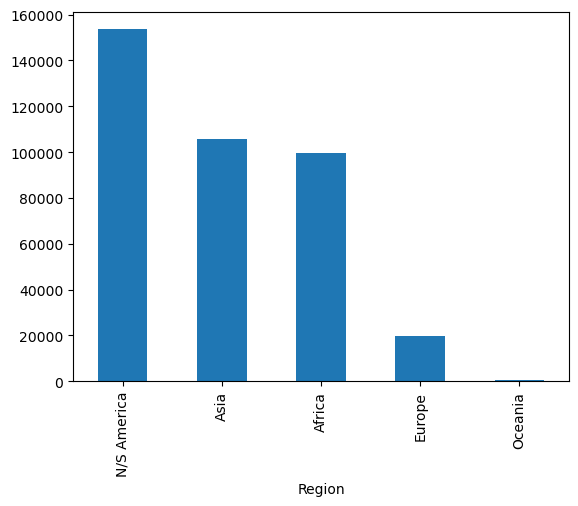

In [97]:
df2.plot(kind = "bar")
py.show()

## 4) Sub_region wise homicide count :

In [101]:
data.groupby("Subregion")["Count"].sum().sort_values(ascending = False)

Subregion
South America             78872
Southern Asia             58631
Central America           47371
Western Africa            46318
South-Eastern Asia        25314
Eastern Africa            23669
Northern America          22317
Southern Africa           21479
Eastern Europe            14604
Western Asia              11638
Eastern Asia               8563
Northern Africa            5538
Caribbean                  5037
Middle Africa              2477
Northern Europe            2097
Western Europe             2075
Central Asia               1406
Southern Europe            1093
Australia, New Zealand      347
Name: Count, dtype: int32

In [102]:
df3 = data.groupby("Subregion")["Count"].sum().sort_values(ascending = False)

In [103]:
df3

Subregion
South America             78872
Southern Asia             58631
Central America           47371
Western Africa            46318
South-Eastern Asia        25314
Eastern Africa            23669
Northern America          22317
Southern Africa           21479
Eastern Europe            14604
Western Asia              11638
Eastern Asia               8563
Northern Africa            5538
Caribbean                  5037
Middle Africa              2477
Northern Europe            2097
Western Europe             2075
Central Asia               1406
Southern Europe            1093
Australia, New Zealand      347
Name: Count, dtype: int32

In [104]:
df3.index  ## It will show subregion....

Index(['South America', 'Southern Asia', 'Central America', 'Western Africa',
       'South-Eastern Asia', 'Eastern Africa', 'Northern America',
       'Southern Africa', 'Eastern Europe', 'Western Asia', 'Eastern Asia',
       'Northern Africa', 'Caribbean', 'Middle Africa', 'Northern Europe',
       'Western Europe', 'Central Asia', 'Southern Europe',
       'Australia, New Zealand'],
      dtype='object', name='Subregion')

In [105]:
df3.values  ## It will show count values...

array([78872, 58631, 47371, 46318, 25314, 23669, 22317, 21479, 14604,
       11638,  8563,  5538,  5037,  2477,  2097,  2075,  1406,  1093,
         347])

<AxesSubplot:xlabel='Subregion'>

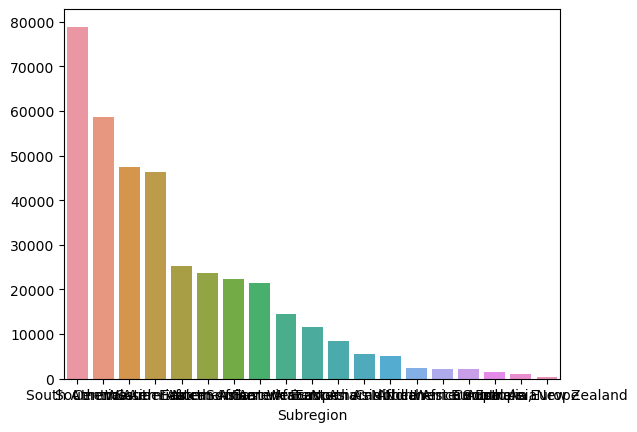

In [110]:
sns.barplot(x = df3.index , y = df3.values)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 [Text(0, 0, 'South America'),
  Text(1, 0, 'Southern Asia'),
  Text(2, 0, 'Central America'),
  Text(3, 0, 'Western Africa'),
  Text(4, 0, 'South-Eastern Asia'),
  Text(5, 0, 'Eastern Africa'),
  Text(6, 0, 'Northern America'),
  Text(7, 0, 'Southern Africa'),
  Text(8, 0, 'Eastern Europe'),
  Text(9, 0, 'Western Asia'),
  Text(10, 0, 'Eastern Asia'),
  Text(11, 0, 'Northern Africa'),
  Text(12, 0, 'Caribbean'),
  Text(13, 0, 'Middle Africa'),
  Text(14, 0, 'Northern Europe'),
  Text(15, 0, 'Western Europe'),
  Text(16, 0, 'Central Asia'),
  Text(17, 0, 'Southern Europe'),
  Text(18, 0, 'Australia, New Zealand')])

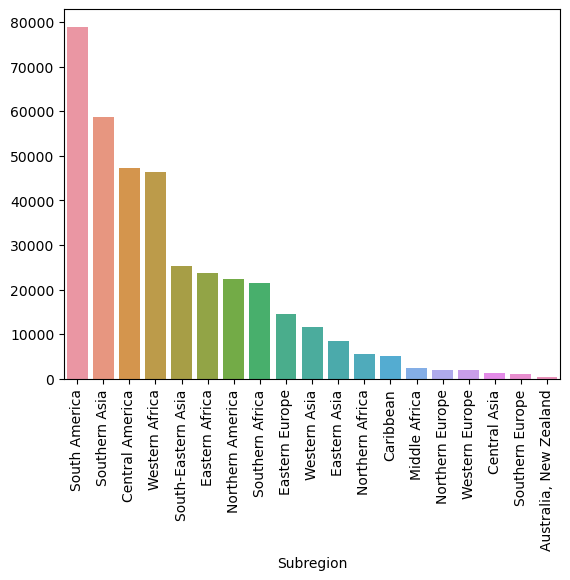

In [111]:
sns.barplot(x = df3.index , y = df3.values)
py.xticks(rotation = '90')

## 5) Year wise homicide count :

In [117]:
df4  = data["Year"].value_counts()

In [118]:
df4

2020    94
2019    20
2018    13
2012    11
2017    10
2016     9
2015     9
2009     6
2014     5
2013     5
2011     5
2010     3
2006     2
2007     1
2021     1
2008     1
Name: Year, dtype: int64

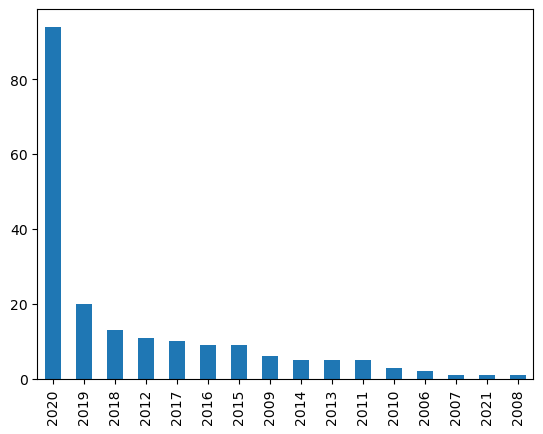

In [122]:
df4.plot(kind = "bar")
py.show()

## 6) Homicide count of Asia and Europe :

In [116]:
data[data["Region"].isin(["Asia" ,"Europe"])]

,Location,Region,Subregion,Rate,Count,Year
0,Afghanistan,Asia,Southern Asia,6,2474,2018
1,Albania,Europe,Southern Europe,2,61,2020
3,Andorra,Europe,Southern Europe,2,2,2020
8,Armenia,Asia,Western Asia,1,52,2020
11,Austria,Europe,Western Europe,0,65,2020
...,...,...,...,...,...,...
183,United Arab Emirates,Asia,Western Asia,0,64,2019
184,United Kingdom,Europe,Northern Europe,1,755,2018
189,Uzbekistan,Asia,Central Asia,1,396,2019
191,Vietnam,Asia,South-Eastern Asia,1,1358,2011


In [123]:
df5 = data[data["Region"].isin(["Asia" ,"Europe"])]

In [125]:
df5 = df5[df5["Year"] > 2016][["Region" , "Year" , "Count"]]

In [126]:
df5

,Region,Year,Count
0,Asia,2018,2474
1,Europe,2020,61
3,Europe,2020,2
8,Asia,2020,52
11,Europe,2020,65
...,...,...,...
178,Asia,2020,2095
182,Europe,2017,2751
183,Asia,2019,64
184,Europe,2018,755


In [128]:
df5 = df5.groupby(["Region" , "Year"])["Count"].sum()

In [129]:
df5

Region  Year
Asia    2017     1787
        2018    16923
        2019     6458
        2020    53516
        2021    15299
Europe  2017     3670
        2018      883
        2019      249
        2020    15066
Name: Count, dtype: int32

In [130]:
df_unstacked = df5.unstack(level = 0)
df_unstacked

Region,Asia,Europe
Year,,
2017,1787.0,3670.0
2018,16923.0,883.0
2019,6458.0,249.0
2020,53516.0,15066.0
2021,15299.0,NaN


In [131]:
df5.unstack(level = -1)

Year,2017,2018,2019,2020,2021
Region,,,,,
Asia,1787.0,16923.0,6458.0,53516.0,15299.0
Europe,3670.0,883.0,249.0,15066.0,NaN


<AxesSubplot:xlabel='Year'>

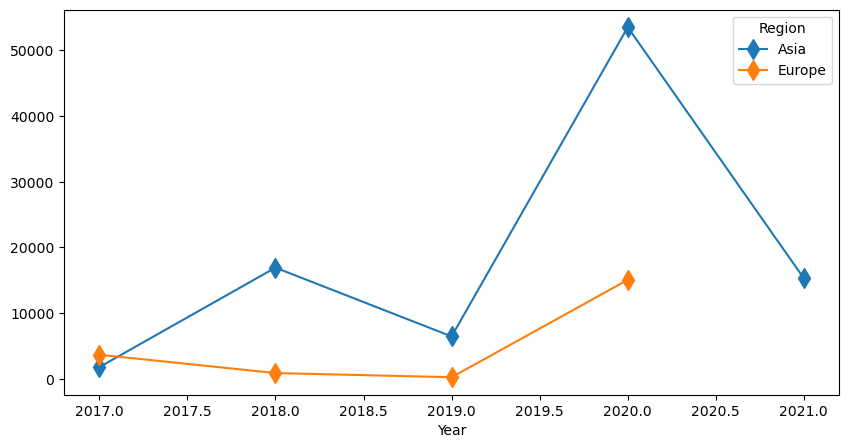

In [137]:
df_unstacked.plot(kind = "line" , figsize = (10,5) , marker = "d" ,ms = 10)

## X lables showing floating values so ,need to change into Integer values

In [140]:
df_unstacked.index = df_unstacked.index.astype(int).astype(str)

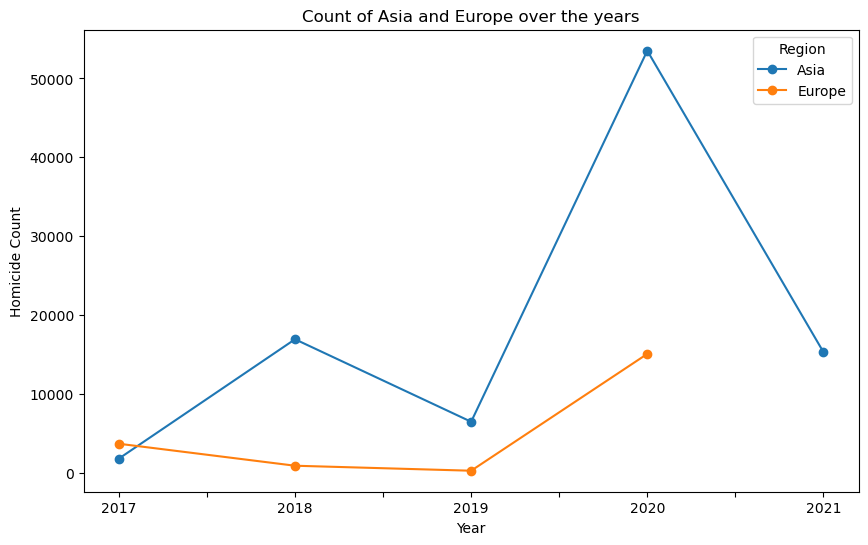

In [149]:
df_unstacked.plot( kind = "line" ,marker = "o", figsize = (10,6))
py.xlabel("Year")
py.ylabel("Homicide Count")
py.title('Count of Asia and Europe over the years')
py.show()

## 7) Year wise count :

In [151]:
data

,Location,Region,Subregion,Rate,Count,Year
0,Afghanistan,Asia,Southern Asia,6,2474,2018
1,Albania,Europe,Southern Europe,2,61,2020
2,Algeria,Africa,Northern Africa,1,580,2020
3,Andorra,Europe,Southern Europe,2,2,2020
4,Angola,Africa,Middle Africa,4,1217,2012
...,...,...,...,...,...,...
190,Venezuela,N/S America,South America,36,10598,2018
191,Vietnam,Asia,South-Eastern Asia,1,1358,2011
192,Yemen,Asia,Western Asia,6,1703,2013
193,Zambia,Africa,Eastern Africa,5,853,2015


In [154]:
data.groupby("Year")["Rate"].sum().sort_values(ascending = False)

Year
2020    564
2019    153
2012    113
2016     76
2018     64
2015     55
2014     52
2009     36
2021     28
2017     27
2013     20
2007     19
2010     18
2006     12
2011      8
2008      5
Name: Rate, dtype: int32

In [155]:
df6 = data.groupby("Year")["Rate"].sum().sort_values(ascending = False)

In [156]:
df6

Year
2020    564
2019    153
2012    113
2016     76
2018     64
2015     55
2014     52
2009     36
2021     28
2017     27
2013     20
2007     19
2010     18
2006     12
2011      8
2008      5
Name: Rate, dtype: int32

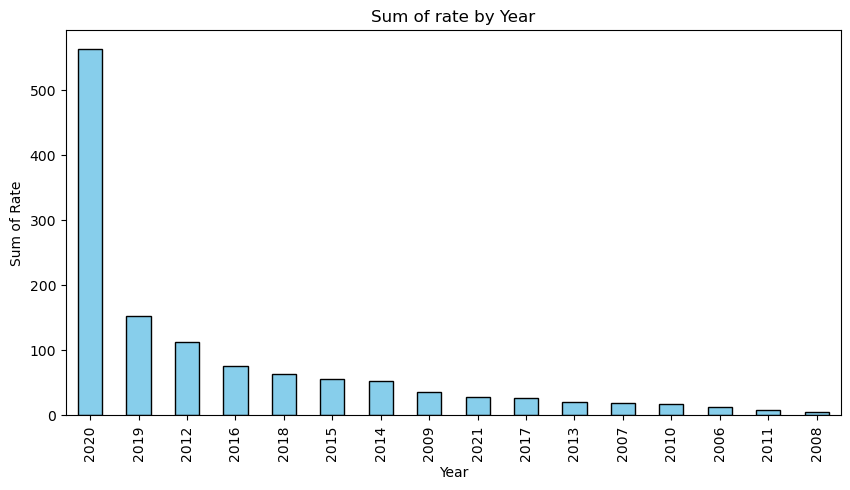

In [163]:
df6.plot( kind = "bar" , figsize = (10,5) , color = "skyblue" , edgecolor = "black")
py.title("Sum of rate by Year")
py.ylabel("Sum of Rate")
py.show()

## 8) Region and Year wise Homicide Count :

In [167]:
df7 = data[["Year" , "Region" , "Count"]]
df7

,Year,Region,Count
0,2018,Asia,2474
1,2020,Europe,61
2,2020,Africa,580
3,2020,Europe,2
4,2012,Africa,1217
...,...,...,...
190,2018,N/S America,10598
191,2011,Asia,1358
192,2013,Asia,1703
193,2015,Africa,853


In [177]:
df7.groupby(["Year" , "Region"]).sum().sort_values(by = "Year",ascending = False)

Count
Year Region             
2021 Asia          15299
2020 Oceania         221
     N/S America  134784
     Europe        15066
     Asia          53516
     Africa        28460
2019 Europe          249
     Africa        44210
     Asia           6458
     N/S America    4276
     Oceania         126
2018 N/S America   13793
     Europe          883
     Asia          16923
2017 Europe         3670
     Asia           1787
     Africa         1467
2016 Asia            627
     N/S America     608
     Europe            0
     Africa         4987
2015 Asia            241
     Africa         2206
     Europe            0
2014 N/S America      13
     Asia           3029
2013 Asia           5782
2012 Africa        15264
     N/S America      53
     Asia             61
2011 Asia           1626
     Africa          855
     Europe            0
2010 Europe            1
     Africa          303
2009 N/S America      42
     Africa           27
2008 Africa         1702
2007 N/S America      26
2006 N/S America       2
     Asia            203

In [178]:
df7 = df7.groupby(["Year" , "Region"]).sum().sort_values(by = "Year",ascending = False)
df7

Count
Year Region             
2021 Asia          15299
2020 Oceania         221
     N/S America  134784
     Europe        15066
     Asia          53516
     Africa        28460
2019 Europe          249
     Africa        44210
     Asia           6458
     N/S America    4276
     Oceania         126
2018 N/S America   13793
     Europe          883
     Asia          16923
2017 Europe         3670
     Asia           1787
     Africa         1467
2016 Asia            627
     N/S America     608
     Europe            0
     Africa         4987
2015 Asia            241
     Africa         2206
     Europe            0
2014 N/S America      13
     Asia           3029
2013 Asia           5782
2012 Africa        15264
     N/S America      53
     Asia             61
2011 Asia           1626
     Africa          855
     Europe            0
2010 Europe            1
     Africa          303
2009 N/S America      42
     Africa           27
2008 Africa         1702
2007 N/S America      26
2006 N/S America       2
     Asia            203

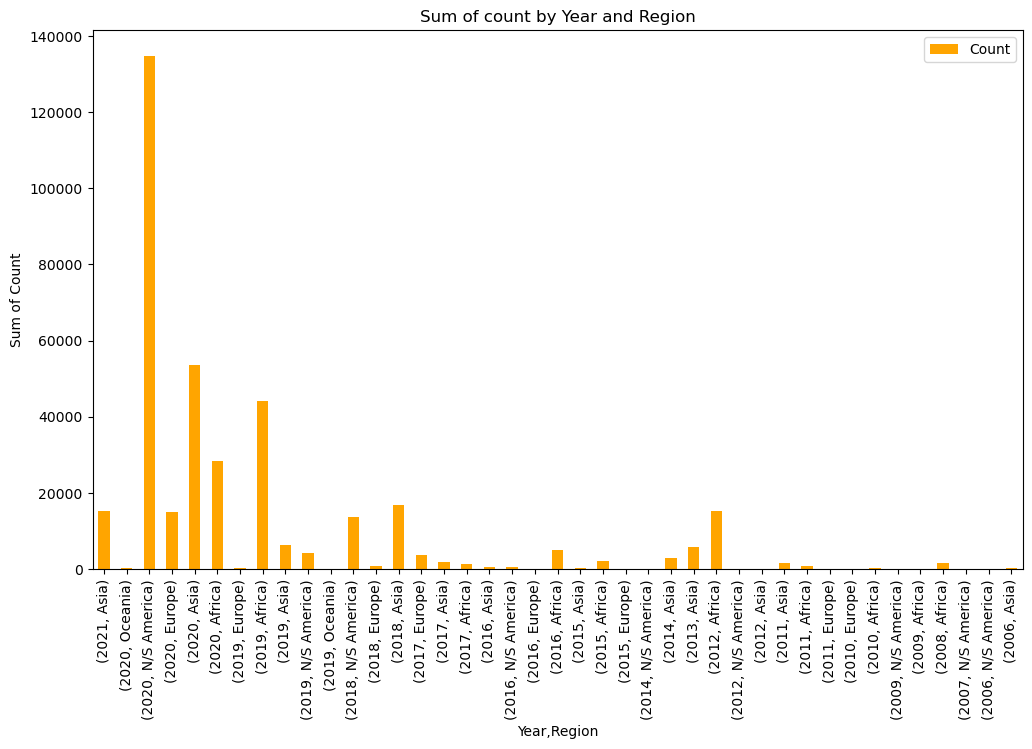

In [186]:
df7.plot(kind = "bar" ,figsize = (12,7) ,color = "orange")
py.ylabel("Sum of Count")
py.title("Sum of count by Year and Region")
py.show()

## 9) Sub_region wise mean of count  :

In [193]:
data.groupby("Subregion")["Count"].mean().sort_values(ascending = False).round(2)

Subregion
Southern Asia             6514.56
South America             6067.08
Central America           5921.38
Northern America          4463.40
Southern Africa           4295.80
Western Africa            4210.73
South-Eastern Asia        2531.40
Eastern Africa            1577.93
Eastern Europe            1460.40
Eastern Asia              1223.29
Northern Africa           1107.60
Middle Africa              619.25
Western Asia               581.90
Central Asia               281.20
Western Europe             230.56
Caribbean                  201.48
Australia, New Zealand     173.50
Northern Europe            139.80
Southern Europe             64.29
Name: Count, dtype: float64

In [194]:
df8 = data.groupby("Subregion")["Count"].mean().sort_values(ascending = False).round(2)
df8

Subregion
Southern Asia             6514.56
South America             6067.08
Central America           5921.38
Northern America          4463.40
Southern Africa           4295.80
Western Africa            4210.73
South-Eastern Asia        2531.40
Eastern Africa            1577.93
Eastern Europe            1460.40
Eastern Asia              1223.29
Northern Africa           1107.60
Middle Africa              619.25
Western Asia               581.90
Central Asia               281.20
Western Europe             230.56
Caribbean                  201.48
Australia, New Zealand     173.50
Northern Europe            139.80
Southern Europe             64.29
Name: Count, dtype: float64

In [195]:
df8.index

Index(['Southern Asia', 'South America', 'Central America', 'Northern America',
       'Southern Africa', 'Western Africa', 'South-Eastern Asia',
       'Eastern Africa', 'Eastern Europe', 'Eastern Asia', 'Northern Africa',
       'Middle Africa', 'Western Asia', 'Central Asia', 'Western Europe',
       'Caribbean', 'Australia, New Zealand', 'Northern Europe',
       'Southern Europe'],
      dtype='object', name='Subregion')

In [196]:
df8.values

array([6514.56, 6067.08, 5921.38, 4463.4 , 4295.8 , 4210.73, 2531.4 ,
       1577.93, 1460.4 , 1223.29, 1107.6 ,  619.25,  581.9 ,  281.2 ,
        230.56,  201.48,  173.5 ,  139.8 ,   64.29])

## Create datframe using above data :

In [198]:
Frame = {
    "Category" : df8.index,
    "Values" : df8.values,
    "Info" : df8.values
}

df9 = pd.DataFrame(Frame)
df9

,Category,Values,Info
0,Southern Asia,6514.56,6514.56
1,South America,6067.08,6067.08
2,Central America,5921.38,5921.38
3,Northern America,4463.40,4463.40
4,Southern Africa,4295.80,4295.80
5,Western Africa,4210.73,4210.73
6,South-Eastern Asia,2531.40,2531.40
7,Eastern Africa,1577.93,1577.93
8,Eastern Europe,1460.40,1460.40
9,Eastern Asia,1223.29,1223.29


In [204]:
fig = px.treemap(df9 , path = ["Category"], values = "Values" , title = "TreeMap")
fig.update_traces(hovertemplate = "Category : %{label}<br>Value:%{value}")
fig.show()